In [1]:
# Install Biopython on JupyterLab

!pip install Biopython


In [2]:
# Load modules and import libraries needed

import Bio as Bio
import Bio.Align.Applications

from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

from io import StringIO

#import pandas as pd
import os
import numpy as np
import networkx as nx 
import matplotlib
import matplotlib.pyplot as plt
#import pylab 
#import scipy.stats


#from Bio.SeqIO.FastaIO import SimpleFastaParser

# For readability, formats output in a neat format: from pprint import pprint

In [3]:
# Output goal:

In [3]:
# Aligned files needed for parsing

msa = r"C:\Users\neil_\Documents\GitHub\dog-genomics\data\mafft_alignments\second_MSA.aln"


In [4]:
# Generate alignment file output and check details

read_aln = AlignIO.read(msa, "clustal")

# Add test to see if there is a file

print(read_aln)


Alignment with 100 rows and 16755 columns
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|CM023446.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|MW916043.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|MW916029.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|MW916019.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|MW916050.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|MW916030.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|DQ480498.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|KU290784.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|KU290805.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|KU290571.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|KU290872.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|KU290707.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|KU290400.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAA...TAA gb|KU290444.1|
GTTAATGTAGCTTAATTAATAAAGCAAGGCACTG

In [5]:
# Return the maximum length of the alignment

aln_len = read_aln.get_alignment_length()

aln_len

# Add test to check if there are any alignments in file, assert error if <2 rows

# print(f" There are {} sequences in this alignment)

# Maybe test if each sequence has the same length somehow?
# Number of sequences in the alignment

# len(ClustalAlign)

16755

In [6]:
# Calculate distance matrix for the entire alignment

cal_dm = DistanceCalculator('identity')


In [7]:

# Distance matrix added to calculator object 

dm = cal_dm.get_distance(read_aln)


In [8]:
type(dm)

Bio.Phylo.TreeConstruction.DistanceMatrix

In [10]:
#print(dm)

In [25]:
# Create a numpy array for Biopython's distance matrix

bpdm = np.array(dm)

#print(bpdm)

# numpy.argmin suggestion, or numpy.amin returns minimum values along a given axis. Needs to be edited, only index no. returned

index_array = np.argmin (bpdm, axis=-1)
# Maybe index array a[-1:]

print(index_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 20 22 23
 24 25 25 25 25 25 25 25 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 84 84 84 88 89 90 91 91 93 94 95
 96 97 98 99]


In [27]:
# Smallest distance found, but between what?

sml_dst = np.min(bpdm[np.nonzero(bpdm)])

sml_dst

5.9683676514432626e-05

In [30]:
# Dodgy dataframe, appending all the distances into a list for pandas 

import pandas as pd

distances = []
#names = []

for distlis in dm.matrix:
      distances.append(distlis)
        
#for ids in dm.names:
#    names.append(ids)

# Find a way to keep ids with array
distmatDF = pd.DataFrame(distances)

distmatDF

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001313,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.001373,0.000060,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.001432,0.000358,0.000418,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.001492,0.000418,0.000477,0.000179,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.004476,0.004058,0.004058,0.003939,0.003999,0.004954,0.005133,0.003641,0.003700,0.003700,...,0.003939,0.003999,0.003999,0.005192,0.004834,0.000000,NaN,NaN,NaN,NaN
96,0.004596,0.004118,0.004178,0.004118,0.004178,0.004834,0.005133,0.004178,0.004238,0.004238,...,0.004058,0.004118,0.004118,0.005133,0.004655,0.004476,0.000000,NaN,NaN,NaN
97,0.004775,0.004357,0.004417,0.004357,0.004417,0.004894,0.005013,0.004417,0.004476,0.004476,...,0.004297,0.004357,0.004357,0.005252,0.004834,0.004715,0.000239,0.000000,NaN,NaN
98,0.004775,0.004178,0.004238,0.004297,0.004357,0.004894,0.005133,0.004476,0.004536,0.004417,...,0.004357,0.004417,0.004417,0.005431,0.004834,0.004775,0.001970,0.002149,0.000000,NaN


In [31]:
type(distmatDF)

pandas.core.frame.DataFrame

In [37]:
# Why is it returning all indexes?

distmatDF.idxmin(axis=1, skipna=True)

0      0
1      1
2      2
3      3
4      4
      ..
95    95
96    96
97    97
98    98
99    99
Length: 100, dtype: int64

In [38]:
# Slice index to find the "New" sequence and the smallest value not 0 and return the name corresponding to that column

distmatDF [-7:]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
93,0.002387,0.002686,0.002745,0.002686,0.002745,0.002447,0.002566,0.002626,0.002686,0.002686,...,0.002566,0.002626,0.002626,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
94,0.002208,0.002328,0.002387,0.002208,0.002268,0.002686,0.002507,0.002387,0.002447,0.002447,...,0.002149,0.002208,0.002208,0.001850,0.000000,NaN,NaN,NaN,NaN,NaN
95,0.004476,0.004058,0.004058,0.003939,0.003999,0.004954,0.005133,0.003641,0.003700,0.003700,...,0.003939,0.003999,0.003999,0.005192,0.004834,0.000000,NaN,NaN,NaN,NaN
96,0.004596,0.004118,0.004178,0.004118,0.004178,0.004834,0.005133,0.004178,0.004238,0.004238,...,0.004058,0.004118,0.004118,0.005133,0.004655,0.004476,0.000000,NaN,NaN,NaN
97,0.004775,0.004357,0.004417,0.004357,0.004417,0.004894,0.005013,0.004417,0.004476,0.004476,...,0.004297,0.004357,0.004357,0.005252,0.004834,0.004715,0.000239,0.000000,NaN,NaN
98,0.004775,0.004178,0.004238,0.004297,0.004357,0.004894,0.005133,0.004476,0.004536,0.004417,...,0.004357,0.004417,0.004417,0.005431,0.004834,0.004775,0.001970,0.002149,0.000000,NaN
99,0.004596,0.004118,0.004118,0.004118,0.004178,0.004775,0.005133,0.003700,0.003760,0.003760,...,0.004357,0.004417,0.004417,0.005372,0.005013,0.004238,0.002029,0.002268,0.002328,0.0


In [25]:
dm.names

['gb|CM023446.1|',
 'gb|MW916043.1|',
 'gb|MW916029.1|',
 'gb|MW916019.1|',
 'gb|MW916050.1|',
 'gb|MW916030.1|',
 'gb|DQ480498.1|',
 'gb|KU290784.1|',
 'gb|KU290805.1|',
 'gb|KU290571.1|',
 'gb|KU290872.1|',
 'gb|KU290707.1|',
 'gb|KU290400.1|',
 'gb|KU290444.1|',
 'gb|KU290937.1|',
 'gb|KU290605.1|',
 'gb|KU290440.1|',
 'gb|KU290767.1|',
 'gb|KU291006.1|',
 'gb|KU290678.1|',
 'gb|MW916055.1|',
 'gb|MW916054.1|',
 'gb|MW916042.1|',
 'gb|MW916023.1|',
 'gb|MW916039.1|',
 'gb|MW916071.1|',
 'gb|MW916070.1|',
 'gb|MW916069.1|',
 'gb|MW916068.1|',
 'gb|MW916067.1|',
 'gb|MW916061.1|',
 'gb|MW916059.1|',
 'gb|MW916063.1|',
 'gb|MW916026.1|',
 'gb|MW916074.1|',
 'gb|MW916027.1|',
 'gb|MH105046.1|',
 'gb|MW916017.1|',
 'gb|AY656744.1|',
 'gb|KU290496.1|',
 'gb|KU290830.1|',
 'gb|KU290417.1|',
 'gb|KU290775.1|',
 'gb|KU291013.1|',
 'gb|KU290702.1|',
 'gb|KU290986.1|',
 'gb|KU290726.1|',
 'gb|KU290531.1|',
 'gb|KU290640.1|',
 'gb|KU290567.1|',
 'gb|KU290781.1|',
 'gb|KU290919.1|',
 'gb|KU29066

In [26]:
dm.matrix

[[0],
 [0.001313040883318406, 0],
 [0.0013727245598328386, 5.9683676514432626e-05, 0],
 [0.0014324082363473822, 0.0003581020590868178, 0.00041778573560136145, 0],
 [0.0014920919128618149,
  0.00041778573560136145,
  0.0004774694121157941,
  0.0001790510295434089,
  0],
 [0.0017905102954342,
  0.0009549388242315882,
  0.0008952551477170445,
  0.001313040883318406,
  0.0013727245598328386,
  0],
 [0.001969561324977609,
  0.0011936735302894297,
  0.0012533572068039733,
  0.0015517755893763585,
  0.0016114592658907911,
  0.0010743061772605644,
  0],
 [0.0014920919128618149,
  0.00041778573560136145,
  0.00041778573560136145,
  0.0005371530886302267,
  0.0005968367651447704,
  0.001313040883318406,
  0.0016114592658907911,
  0],
 [0.0015517755893763585,
  0.0004774694121157941,
  0.0004774694121157941,
  0.0005968367651447704,
  0.000656520441659203,
  0.0013727245598328386,
  0.0016711429424052238,
  5.9683676514432626e-05,
  0],
 [0.0015517755893763585,
  0.0003581020590868178,
  0.000358

In [29]:
# MSA as a numpy array not applicable

#align_array = np.array([list(rec) for rec in ClustalAlign], np.character)
#print("Array shape %i by %i" % align_array.shape)

Array shape 100 by 16755


C:\Users\neil_\AppData\Local\Temp\ipykernel_17108\3911181635.py:3: DeprecationWarning: Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
  align_array = np.array([list(rec) for rec in ClustalAlign], np.character)


In [ ]:
# Find the closest match in numpy array for output goal

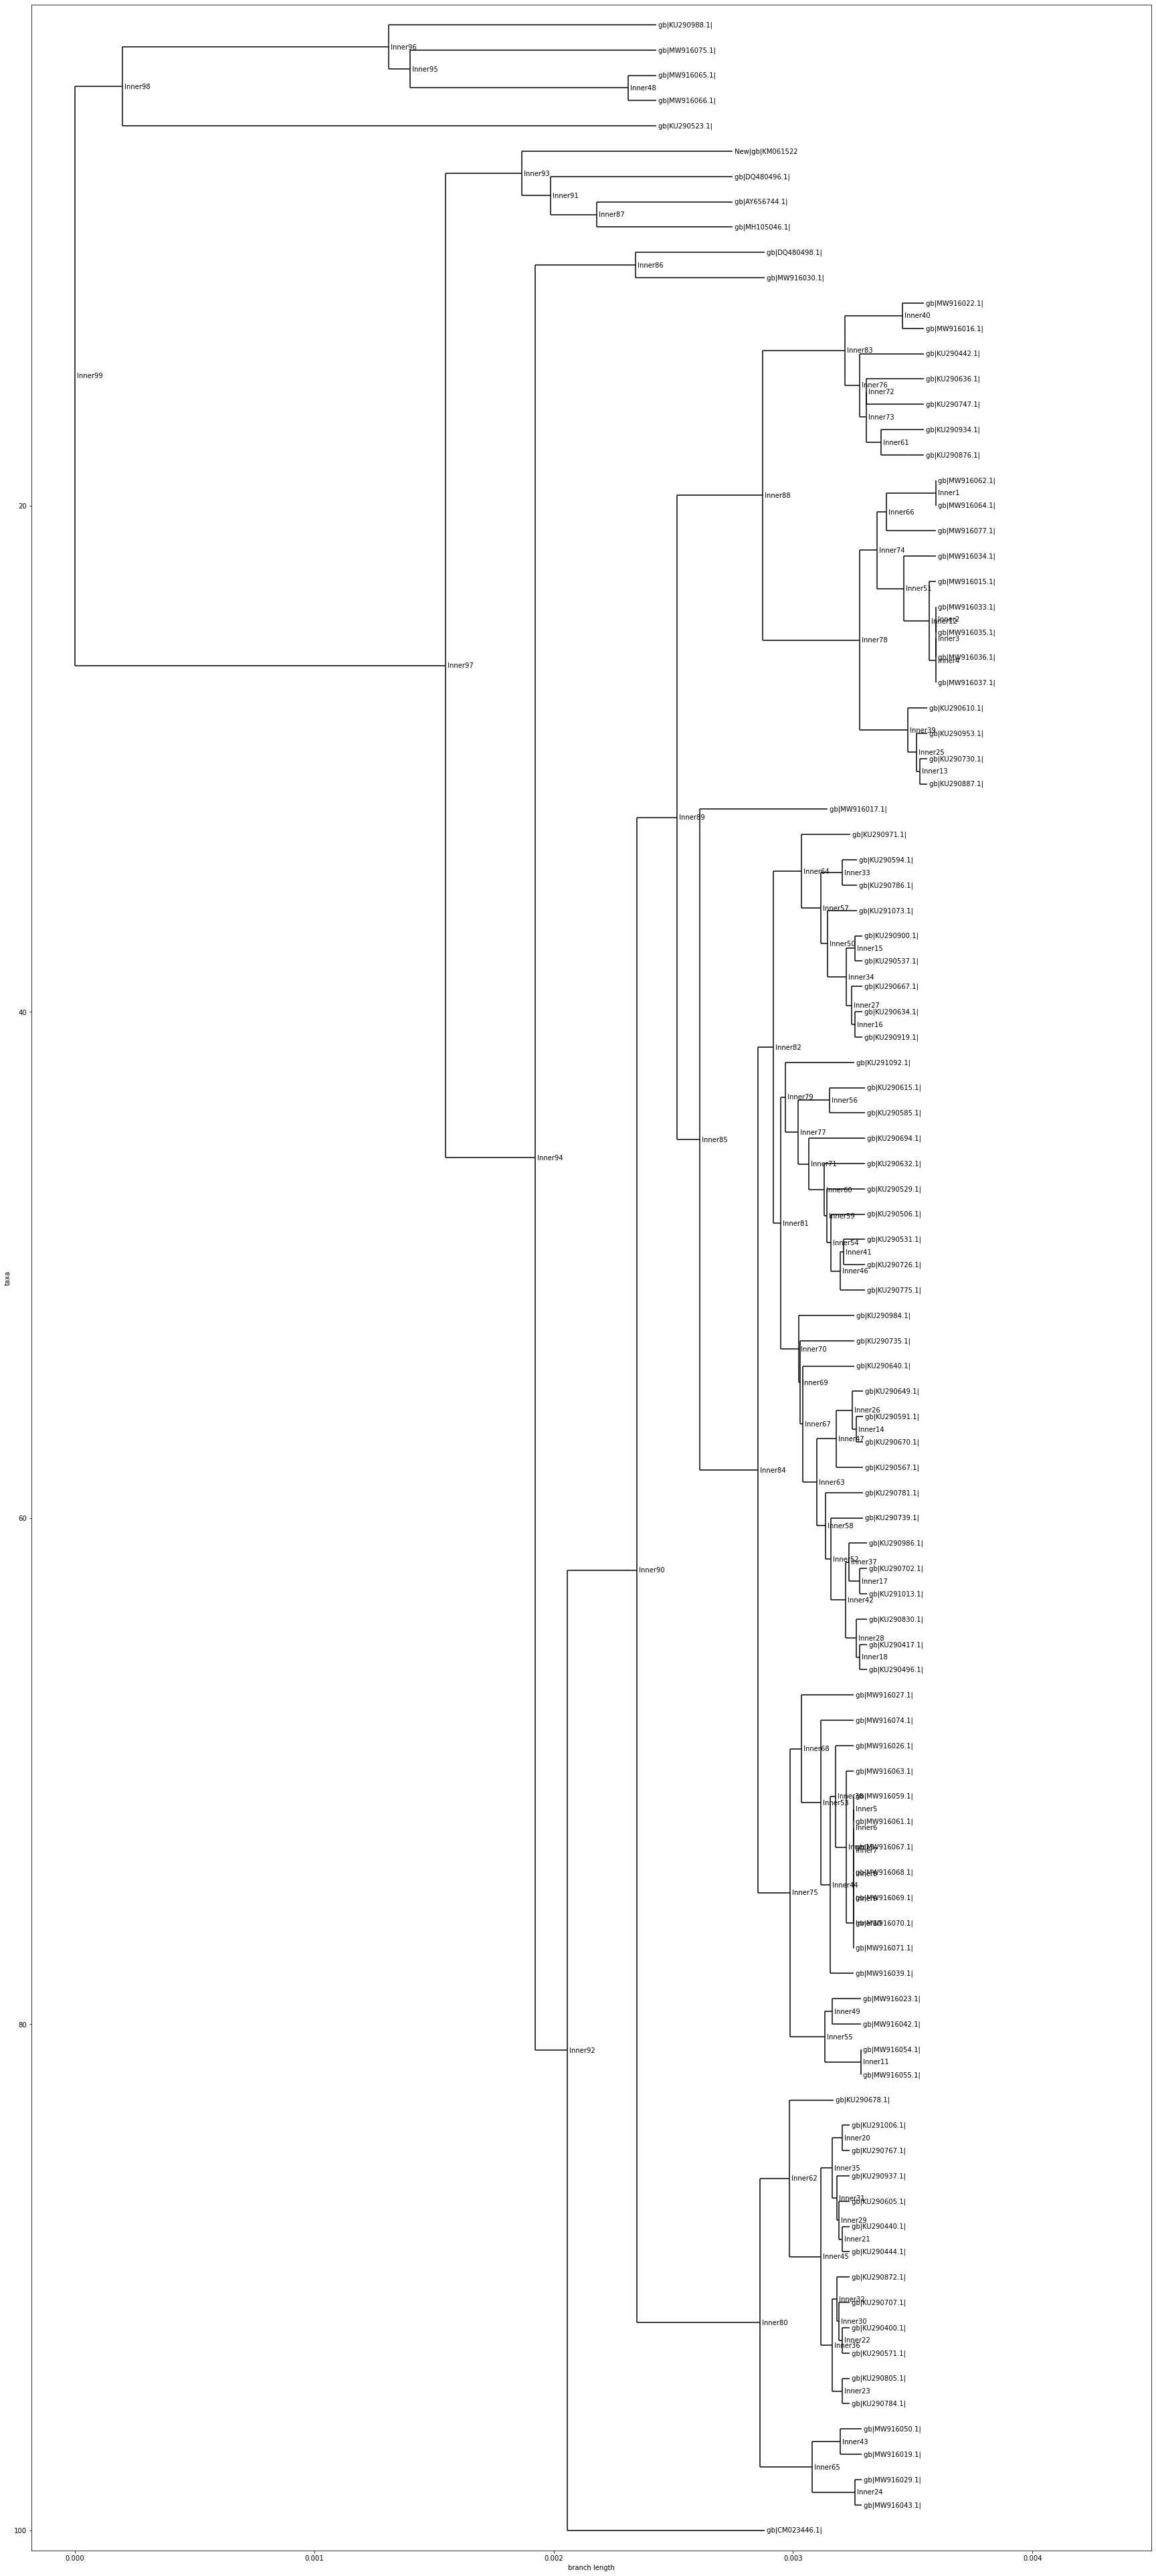

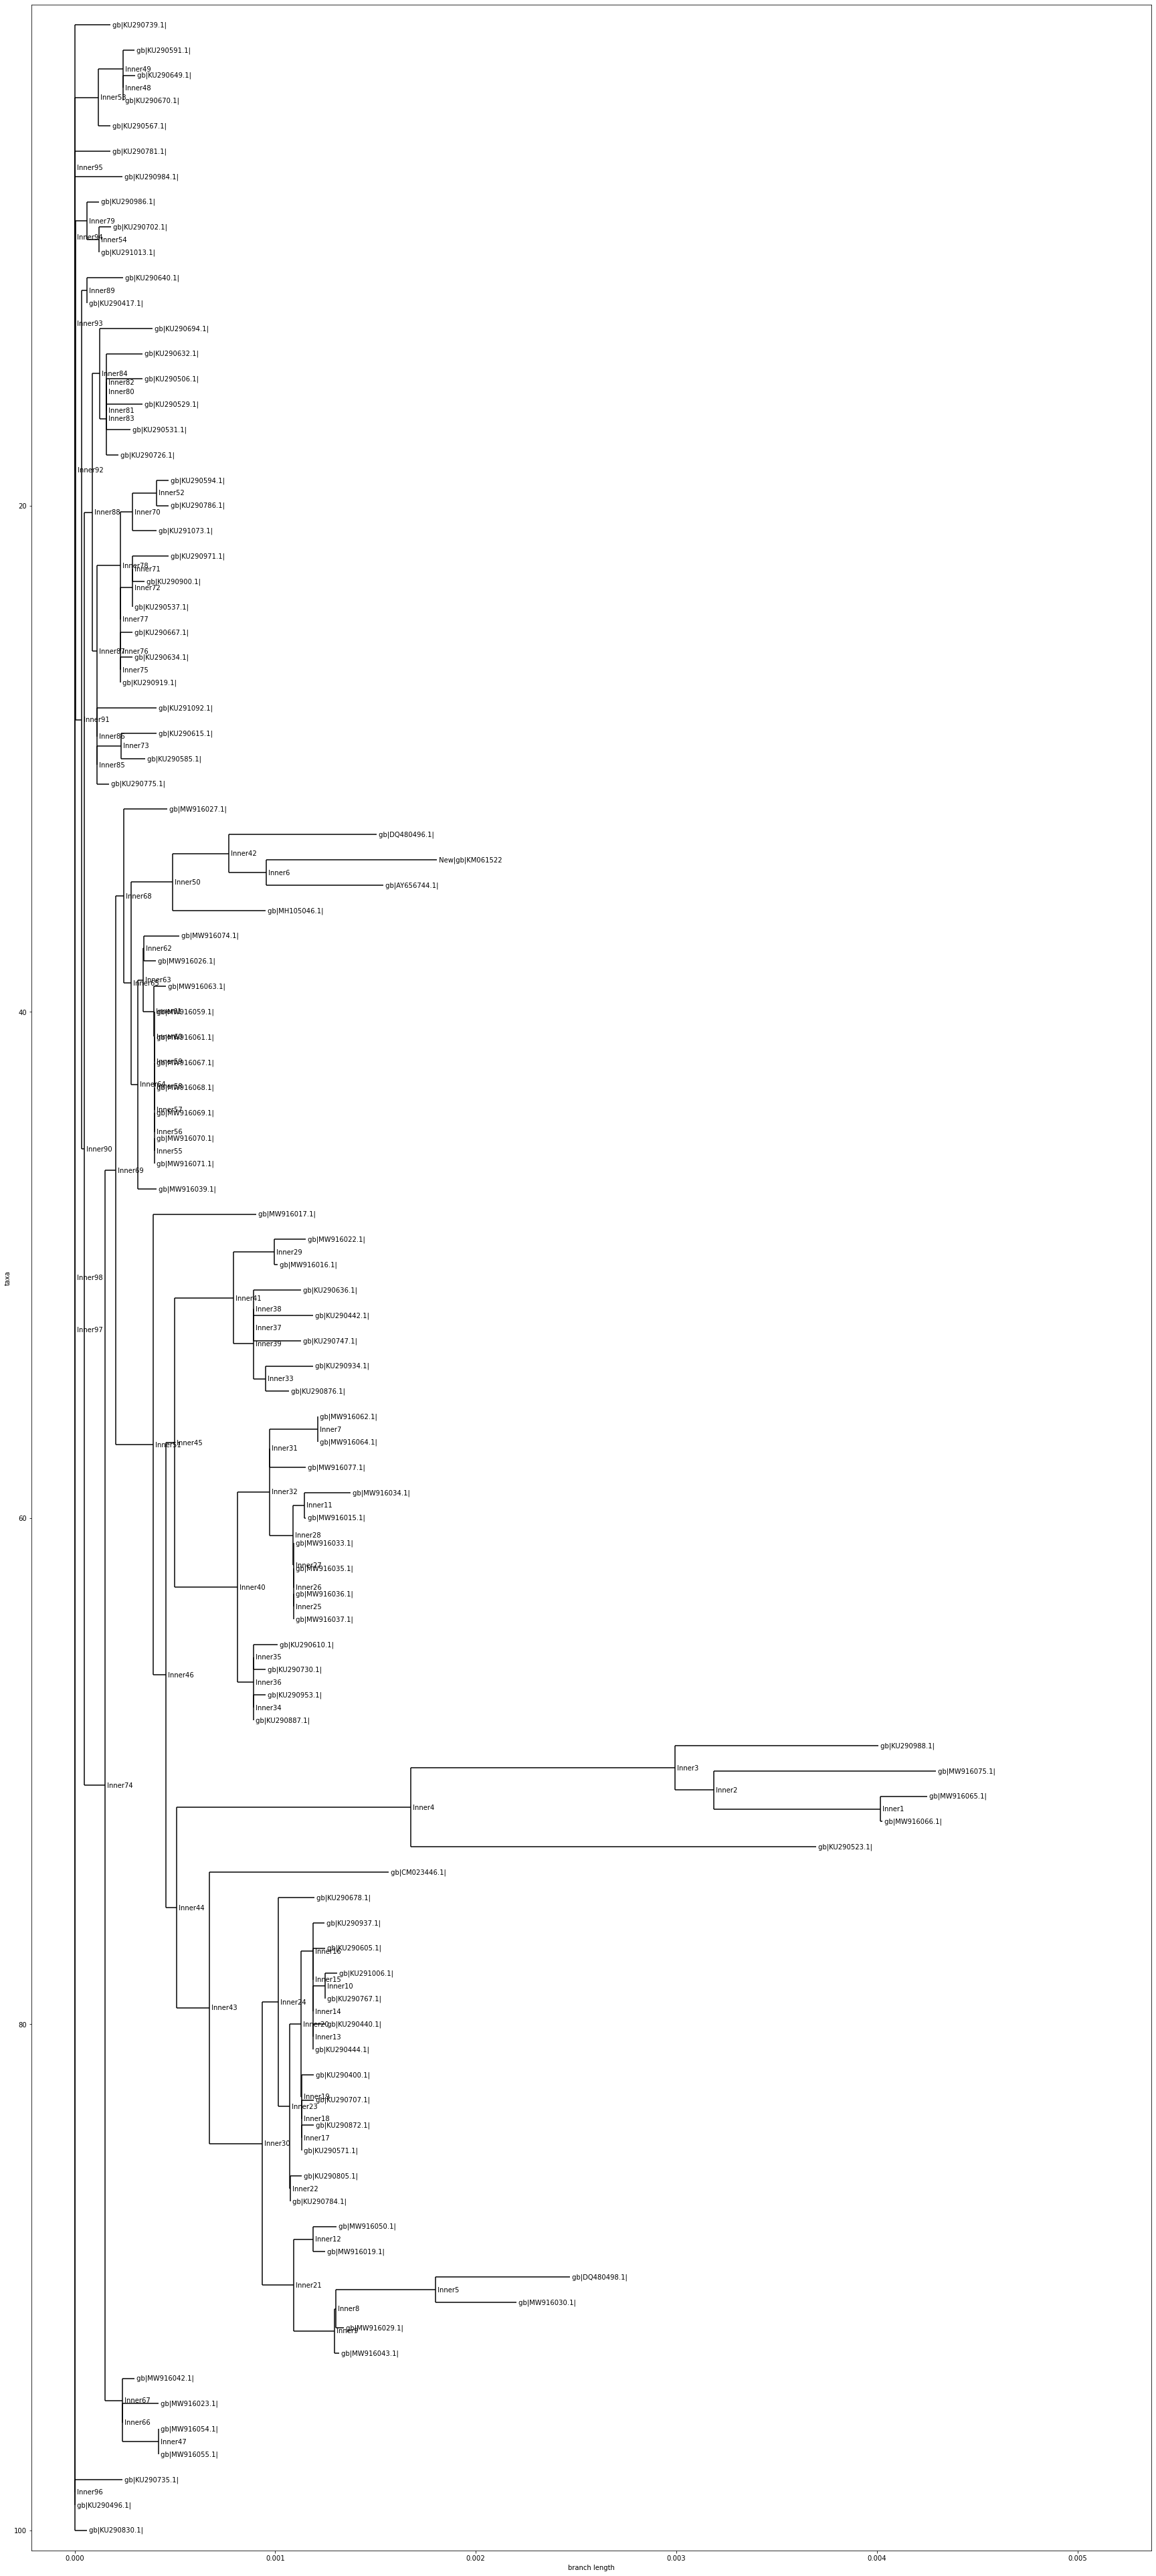

In [18]:
# Strech Goal 2:


# https://www.youtube.com/watch?v=fQ_GWmp9-y8

# Initialise distance tree constructor 

constructor = DistanceTreeConstructor(calculate_dm)

# Build upgma tree
fig,axes = plt.subplots(1,1,figsize=(30,70))
upgma_tree = constructor.upgma(distance_matrix)
Phylo.draw(upgma_tree, axes=axes)

# Build NJ tree
fig,axes = plt.subplots(1,1,figsize=(30,70))
nj_tree = constructor.nj(distance_matrix)
Phylo.draw(nj_tree, axes=axes)

#fig,axes = plt.subplots(1,1,figsize=(30,70))
#upgma_tree = constructor.build_tree(ClustalAlign) # maybe tru .upgma(ClustalAlign) instead
#Phylo.draw(upgma_tree, axes=axes)  # branch_labels=lambda c: c.branch_length
# print(upgma_tree) maybe try this print



In [ ]:
# Clade to look at is name='Inner93' in UPGMA 

In [28]:
def get_parent(tree, child_clade):
    node_path = upgma_tree.get_path(child_clade)
    return node_path[-2]

# Select a clade
myclade = upgma_tree.find_clades("Inner93").next()
# Test the function
parent = get_parent(upgma_tree, myclade)
assert myclade in parent


AttributeError: 'filter' object has no attribute 'next'

TypeError: Must provide a MultipleSeqAlignment object.

In [ ]:
# Same method below as above
# Read the aligned format of file now generated in the data folder
with open("dog_breeds.aln", "r") as aln:
    align = AlignIO.read(aln, "clustal")
print(align)

# Test a small ascii tree before visualising a more detailed phylo in networkx/matplotlib
# https://www.youtube.com/watch?v=ul93UV82Btw
# tree = Phylo.read("dog_breeds.dnd", "newick")
# Phylo.draw_ascii(tree)


# Profile-profile alignment in command line: clustalw2  -profile1=prof1.fa -sequences -profile2=one.fa

In [4]:
# Load all dog records and parse the FASTA sequences

#for in_file in SeqIO.parse("../data/dog_breeds.fa", "fasta"):
#    print(in_file.id)
#    print(repr(in_file.seq))
#    print(len(in_file))

# Load mystery target sequence data and parse FASTA

#for target_record in SeqIO.parse("../data/mystery.fa", "fasta"):
#    print(target_record.id)
#    print(repr(target_record.seq))
#    print(len(target_record))

In [4]:
# Load target sequence data and parse FASTA just so we know what to look for later

for target_seq in SeqIO.parse("../data/mystery.fa", "fasta"):
    print(target_seq.id)
    print(repr(target_seq.seq))
    print(len(target_seq))

gb|KM061522.1|
Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')
16735


In [ ]:
alignment = AlignIO.read('../data/ .clustal', 'clustal')

In [ ]:
# Tree building test

tree = Phylo.read("tree1.nex", "nexus")
Phylo.convert("tree.nex", "nexus", "xxx.xxx", "Newick")
Phylo.write(tree, "xxx.xxx", "Newick")

# Have a look and nodes and leaves of your tree

tree.get_nonterminals()
tree.get_terminals()

In [ ]:
# Cell for construction

# Load PHYLIP alignment to compute distances


aln = AlignIO.read(open('xxxxxx.phy'), 'phylip')
print(aln)

# DNA calculation using ‘identity’ model

calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)
print(dm)


In [ ]:
# Misc notes and extra bits


# Parse fasta file with handler
#count = 0
#with open ("../data/dog_breeds.fa") as handle:
#    for seq_id, seq in SimpleFastaParser(handle):
#        print(count)
